In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv( "Arctic_domain_mean_1979_2021.csv")
# remove date from the set
df = df.drop('Date', axis=1)
# print first 5 rows of data
df.head()
df.loc[:, 'target'] = df['sea_ice_extent']
df = df.assign(target = df.target.shift(-1)).drop(df.index[-1])
data = np.array(df ) #converting data into numpy
target = data[:,-1] #assigning last column to be target variable
data = data[:,:-1] #dropping last column from features
LEN_DATA = len(data) #total number of records
NUM_TRAIN = LEN_DATA - (24+6) #reserve last 30 months for testing
x_train = data[0:NUM_TRAIN]
y_train = target[0:NUM_TRAIN]
x_test = data[NUM_TRAIN:]
y_test=target[NUM_TRAIN:]
#verify data shape after split

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)





(15553, 10)
(15553,)
(30, 10)
(30,)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))


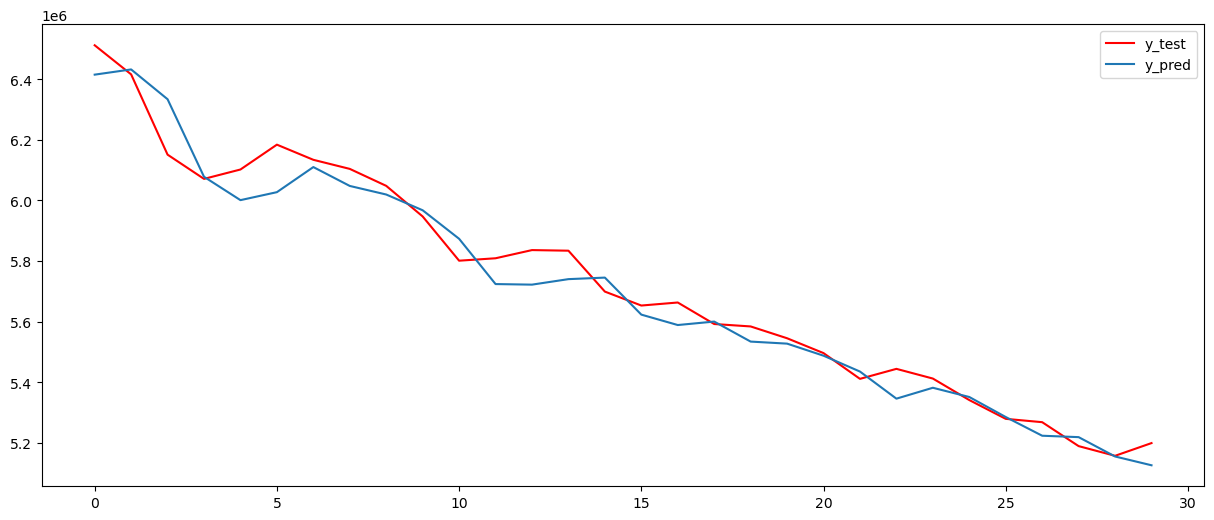

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
inv_y_test = scaler_y.inverse_transform(y_test)
inv_y_pred = scaler_y.inverse_transform(y_test_pred)
fig, ax= plt.subplots(figsize=(15, 6))
plt.plot(inv_y_test, color= 'red')
plt.plot(inv_y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

In [4]:
rmse = np.sqrt(np.mean((inv_y_pred - inv_y_test) ** 2))
print('Test RMSE: %0.3f mil. km2' %(rmse/1000000))

Test RMSE: 0.070 mil. km2


In [5]:
from sklearn.metrics import r2_score
r2 = r2_score(inv_y_test, inv_y_pred)
print('R2 Score: %0.2f' %(r2))

R2 Score: 0.96


In [6]:
import numpy as np
import pandas as pd
lstm_df = pd.read_csv('Arctic_domain_mean_1979_2021.csv')
#drop unwanted variables
lstm_df = lstm_df.drop(['Date'],axis=1)
data = np.array(lstm_df )
target = data[:,-1] #assigning last column to be target variable
data = data[:,:-1] #dropping last column from features

lag = 1
data = data[:-lag]
target = target[lag:]

LEN_DATA = len(data) #total number of samples
NUM_TRAIN = LEN_DATA - (12*2) #reserve last 30 months for testing
x_train = data[0:NUM_TRAIN]
x_test = data[NUM_TRAIN:]
#split features and labels
y_train=target[:NUM_TRAIN]
y_test=target[NUM_TRAIN:]

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))
timesteps = 1


In [7]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import load_model, Model
from attention import Attention
timestep = timesteps
features = 10
model_input = Input(shape=(timestep,features))
x = LSTM(64, return_sequences=True)(model_input)
x = Dropout(0.2)(x)
x = LSTM(32, return_sequences=True)(x)
x = LSTM(16, return_sequences=True)(x)
x = LSTM(16, return_sequences=True)(x)
x = Attention(trainable = True)(x)
x = Dropout(0.2)(x)
x = Dense(32)(x)
x = Dense(16)(x)
x = Dense(1)(x)
model = Model(model_input, x)
model.compile(loss= 'mean_squared_error', optimizer= 'adam')

history=model.fit(x_train, y_train, epochs=200, batch_size=12, verbose=2,
validation_split =0.3, shuffle=True)

from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(8,6))
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'valid')
pyplot.legend()
pyplot.show()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_l = MinMaxScaler()
inv_y_test = scaler_l.inverse_transform(y_test)
# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(inv_y_test, inv_testPred))
print('Test RMSE: %.3f mil km^2' % rmse/1000000)
# calculate R-square
from sklearn.metrics import r2_score
from math import sqrt
r_sq = r2_score(inv_y_test, inv_testPred)
print('Test R_Square: %.2f' % r_sq)

from matplotlib import pyplot
fig, ax= plt.subplots(figsize=(24, 8))
pyplot.plot(inv_testPred)
pyplot.plot(inv_y_test)
plt.legend (['y_pred','y_test'])
pyplot.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv("Arctic_domain_mean_1979_2021.csv")
# remove date from the set
df = df.drop('Date', 1)
data = np.array(df )
target = data[:,-1] 

model = LinearRegression()
model.fit(data, target)
lr_data = model.predict(data)
lr_data = lr_data.reshape(len(lr_data),1)

data = np.concatenate((data,lr_data),axis=1)

# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(inv_y_valid, inv_testPred))
print('Test RMSE: %.3f' % rmse/1000000)

# calculate R2 Score
r2 = r2_score(inv_y_valid, inv_testPred)
print('Test R2 Score: %.3f' % r2)